# HW 8 : Forward Filtering

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

df = pd.read_csv("simdata.csv")
vy = df.values[0][1:]
mF = df.values[1:][:, 1:]
T, p = vy.shape[0], mF.shape[0]
vm0 = np.zeros((p, 1))
mC0 = 0.1*np.eye(p)
amG = [np.eye(p)]*T
amW = [0.1 * np.eye(p)]*T
vV = 0.5 * np.ones(T)

In [7]:
# prepare
T, p = vy.shape[0], mF.shape[0]
ma = np.zeros((T, p))
mm = np.zeros((T, p))
mb = np.zeros((T, p))
amR = [np.eye(p)]*T
amC = [np.eye(p)]*T
    
def FF(vy, mF, vV, amG, amW, vm0, mC0):
    
    vm = vm0
    mC = mC0
    
    # main loop
    for t in range(T):
        
        if t > 0:
            vm = mm[t-1,:].reshape([p, 1])
            mC = amC[t-1]
            
        
        currentF = mF[:, t].reshape([1, p])
        
        ma[t, :] = np.dot(vm.T, amG[t])
        amR[t] = np.dot(np.dot(amG[t], mC), amG[t].T) + amW[t]
        dq = np.dot(np.dot(currentF, amR[t]), currentF.T) + vV[t]
        mA = np.divide(np.dot(currentF, amR[t]), dq)
        
        mm[t, :] = np.dot(vm.T, amG[t]) + np.multiply(mA, vy[t] - np.dot(currentF, np.dot(vm.T, amG[t]).T))
        amC[t] = amR[t] - np.multiply(np.dot(mA.T, mA), dq)
        
    return mm, amC

In [49]:
mm, mC = FF(vy, mF, vV, amG, amW, vm0, mC0)
b1, b2, b3, b4 = mm[:, 0], mm[:, 1], mm[:, 2] ,mm[:, 3]

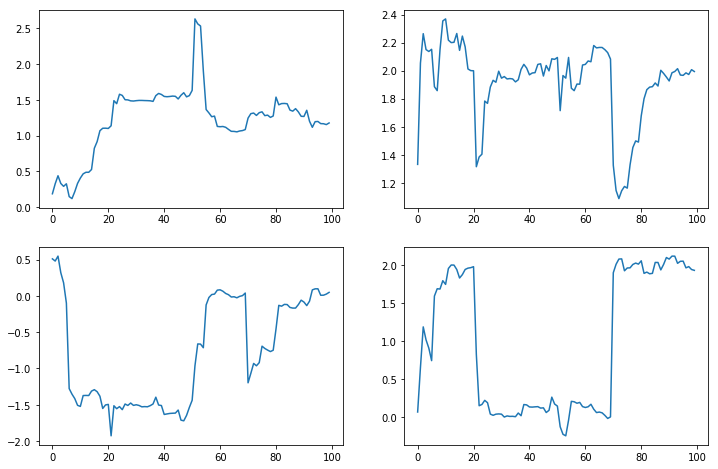

In [51]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].plot(b1)
ax[0, 1].plot(b2)
ax[1, 0].plot(b3)
ax[1, 1].plot(b4)

# HW 9 : Forward Filtering and Backward Sampling

In [51]:
nsim  = 2
amb = [0]*(T-1)

In [ ]:
mB = amC[t]*(amG[t+1]')*invert(amR[t+1]); 
	mH = choleski( amC[t] - mB*amR[t+1]*(mB') );                            		  
		   
	mb = mm[t][] + (mb-ma[t+1][])*(mB') + rann(nsim,p)*(mH');                            

	amb[t] = mb;

In [60]:
def FFBS(vy, mF, vV, amG, amW, vm0, mC0):
    
    vm = vm0
    mC = mC0
    
    # ff loop
    for t in range(T):
        
        if t > 0:
            vm = mm[t-1,:].reshape([p, 1])
            mC = amC[t-1]
            
        
        currentF = mF[:, t].reshape([1, p])
        
        ma[t, :] = np.dot(vm.T, amG[t])
        amR[t] = np.dot(np.dot(amG[t], mC), amG[t].T) + amW[t]
        dq = np.dot(np.dot(currentF, amR[t]), currentF.T) + vV[t]
        mA = np.divide(np.dot(currentF, amR[t]), dq)
        
        m = np.dot(vm.T, amG[t]) + np.multiply(mA, vy[t] - np.dot(currentF, np.dot(vm.T, amG[t]).T))
        mm[t, :] = m
        
        C = amR[t] - np.multiply(np.dot(mA.T, mA), dq)
        amC[t] = C
    
    # BS loop
    C_float = C.astype(np.float64)
    mb = np.random.multivariate_normal(m[0].astype(np.float64), C_float, size = nsim)
    amb[T-2] = mb
    
    for t in reversed(range(T-1)):
        mB = np.dot(np.dot(amC[t], amG[t+1].T), np.linalg.inv(amR[t+1].astype(np.float64)))
        

In [61]:
FFBS(vy, mF, vV, amG, amW, vm0, mC0)

[[ 1.45939697e+00 -1.23234563e+00 -3.98361812e-03  1.29093928e+00]
 [-1.23234563e+00  4.31957613e+00 -6.60118501e-01 -3.01311146e+00]
 [-3.98361812e-03 -6.60118501e-01  2.08418522e+00  7.67806476e-01]
 [ 1.29093928e+00 -3.01311146e+00  7.67806476e-01  3.81205298e+00]]
[[ 1.51409654 -1.14636112  0.09766214  1.22773432]
 [-1.14636112  4.44902361 -1.2106269  -2.98373137]
 [ 0.09766214 -1.2106269   2.80734208  1.32933003]
 [ 1.22773432 -2.98373137  1.32933003  3.87794012]]
[[ 1.74331767 -1.21052829  0.03940596  1.26650242]
 [-1.21052829  4.41090137 -1.30150928 -2.62994427]
 [ 0.03940596 -1.30150928  3.66741212  1.43252492]
 [ 1.26650242 -2.62994427  1.43252492  3.54959717]]
[[ 2.00515899 -1.25994464 -0.91069646  1.06455167]
 [-1.25994464  4.6766107   0.4485885  -1.91336619]
 [-0.91069646  0.4485885   2.83644177 -0.47951339]
 [ 1.06455167 -1.91336619 -0.47951339  2.40496781]]
[[ 1.93991896 -0.70939439 -1.33544289  0.77832632]
 [-0.70939439  4.57702808  0.5520491  -1.51371704]
 [-1.33544289 

In [20]:
np.random.multivariate_normal([0,0], [[1,0.5],[0.5, 1]], size = nsim) 

array([[-1.65138929, -1.81477665],
       [-1.04344772, -1.23638336]])

In [48]:
for i in reversed(range(3)):
    print(i)

2
1
0
